# Lasso Regresyon
# Model

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [3]:
from sklearn.linear_model import Lasso

In [4]:
lasso_model = Lasso(alpha = 0.1).fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388074, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [5]:
lasso_model

Lasso(alpha=0.1)

In [6]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741405606, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679891437, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137393415, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

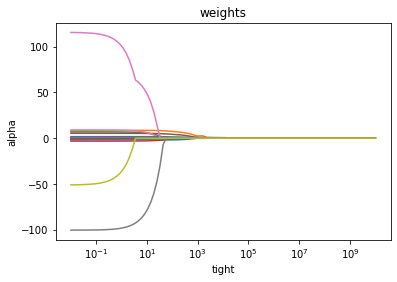

In [7]:
lasso = Lasso()
import matplotlib.pyplot as plt
lambdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar = []
for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train,y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdalar*2,katsayilar)
ax.set_xscale("log")

plt.xlabel("tight")
plt.ylabel("alpha")
plt.title("weights");

# Tahmin

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8330124299743

# Model Tunnig

In [10]:
from sklearn.linear_model import LassoCV

In [11]:
lasso_model = LassoCV(alphas = None,cv = 10,max_iter = 10000,normalize = True)

In [13]:
lasso_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [14]:
lasso_model.alpha_

0.3940612643247005

In [15]:
lasso_tuned = Lasso(alpha = lasso_model.alpha_)

In [16]:
lasso_tuned.fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523987, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3940612643247005)

In [17]:
y_pred = lasso_tuned.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.52263769583675